In [1]:
%matplotlib inline
import sys
import time
import random

from concurrent.futures import ProcessPoolExecutor

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

import features

from dataset import read_leap_motion_data
from features import hog_single

In [2]:
# Dataset Load
persons = read_leap_motion_data('LP_data/dataset', load_cache=True)

Trying fetch cache for persons
Using cache for persons
Time for >>read_leap_motion_data<<: 0.60 s


In [3]:
# Feature Extraction
y = []
X_limg = []
X_rimg = []
for p in persons:
    print('Processing {}'.format(p))
    for g_idx in range(1, 11):
        for idx in range(1, 21):
            g = 'G{}'.format(g_idx)
            d = persons[p][g][idx]
            if not d:
                continue
            X_limg.append(hog_single(d['leye']))
            X_rimg.append(hog_single(d['reye']))
            y.append(g_idx-1)
y = np.array(y)
X_limg = np.array(X_limg)
X_rimg = np.array(X_rimg)

Processing P13
Processing P4
Processing P6
Processing P7
Processing P2
Processing P9
Processing P1
Processing P3
Processing P11
Processing P8
Processing P10
Processing P12
Processing P5


In [4]:
tsne = TSNE()

new_limg = tsne.fit_transform(X_limg, y)

In [5]:
new_limg.shape

(2600, 2)

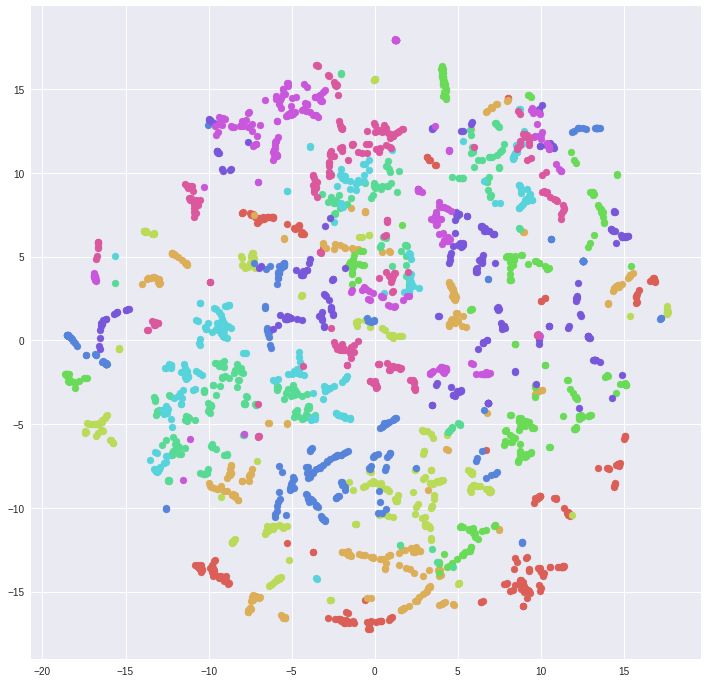

In [6]:
colors = sns.color_palette("hls", 10)
plt.figure(figsize=(12, 12))
for target_y in range(10):
    indices = np.argwhere(y == target_y)
    _x = new_limg[indices, 0]
    _y = new_limg[indices, 1]
    plt.scatter(_x, _y, color=colors[target_y])